# Retail Sales Data Analysis

In this project, we will be exploring and analyzing a historical retail sales dataset that details store-level performance, promotional activities, and seasonal effects over a defined period. The dataset includes information on various stores and their departments, featuring records of weekly sales, store characteristics, and a range of contextual factors such as regional conditions, holidays, and markdown events.

By examining these data, we aim to gain insights into the relationships between promotional markdowns, holiday-driven consumer behavior, and overall sales outcomes across different stores and departments. This exploratory and analytical work will serve as a foundation for understanding the dataset’s intricacies and will guide subsequent modeling and decision-making processes.

The dataset can be found [here](https://www.kaggle.com/datasets/manjeetsingh/retaildataset 'Original Dataset from Manjeet Singh') on Kaggle.com by Manjeet Singh.

First step is importing some libraries for use in Python. I also set the default theme for plots to Seaborn's default theme.

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sns.set_theme()

In the next block of code, I use the Path function from pathlib to create some 'safe' relative file paths. I then use those file paths and Panda's read_csv function to create some DataFrames. Finally, the DataFrame's info is printed out so that we can get to know the data a bit.

In [2]:
features_data_file_path = Path('data/features_data_set.csv')
sales_data_file_path = Path('data/sales_data_set.csv')
stores_data_file_path = Path('data/stores_data_set.csv')

features_df = pd.read_csv(features_data_file_path)
sales_df = pd.read_csv(sales_data_file_path)
stores_df = pd.read_csv(stores_data_file_path)

print(features_df.info())
print(sales_df.info())
print(stores_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store     

Let's convert some of the data types before we work with the datasets. After the conversions I will print out the data types again so that we can verify the changes.

In [3]:
features_df['Date'] = pd.to_datetime(features_df['Date'], format="%d/%m/%Y")
sales_df['Date'] = pd.to_datetime(sales_df['Date'], format="%d/%m/%Y")
stores_df["Type"] = pd.Categorical(stores_df["Type"])

print(features_df['Date'].info())
print(sales_df['Date'].info())
print(stores_df["Type"].info())

<class 'pandas.core.series.Series'>
RangeIndex: 8190 entries, 0 to 8189
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
8190 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 64.1 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 421570 entries, 0 to 421569
Series name: Date
Non-Null Count   Dtype         
--------------   -----         
421570 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.2 MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 45 entries, 0 to 44
Series name: Type
Non-Null Count  Dtype   
--------------  -----   
45 non-null     category
dtypes: category(1)
memory usage: 309.0 bytes
None


Let's go ahead and merge the tables so that we can have all of the information in one DataFrame.

In [4]:
all_tables_merged_df = sales_df.merge(
    features_df,
    on=['Store', 'Date', 'IsHoliday'],
    how='left'
    ).merge(
        stores_df,
        on='Store',
        how='left'
        )

Let's make sure the merge worked by previewing our DataFrame.

In [5]:
all_tables_merged_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


We are going to take a look at the average weekly sales by store. First, we will use groupby to group the data according to the Store number.

When we get the new DataFrame, the mean that is returned by the function is more precise than we really need it to be. We round the numbers so that they look more like regular currency values.

Finally, we will merge the store_df table with the new table so that we can compare the different store types, sizes, and average weekly sales.

After all of that, we preview our DataFrame to make sure everything has gone properly so far.

In [6]:
grouped_by_department_df = all_tables_merged_df.groupby('Store').Weekly_Sales.mean().reset_index()

grouped_by_department_df['Weekly_Sales'] = round(grouped_by_department_df['Weekly_Sales'], 2)

avg_weekly_sales_by_store = pd.merge(
    grouped_by_department_df,
    stores_df,
    on='Store',
    how='left'
)

In [7]:
avg_weekly_sales_by_store.head()

,Store,Weekly_Sales,Type,Size
0,1,21710.54,A,151315
1,2,26898.07,A,202307
2,3,6373.03,B,37392
3,4,29161.21,A,205863
4,5,5053.42,B,34875


## Our first visualization

We will create some visualizations to try to understand the store's types and sizes. This is the information that is provided in the 'stores_data_set.csv'. The reason I wanted to start with these to features is because they appear to be the simplest. Using a simple metric, like the average weekly sales, we can compare stores and their sales in a straighfoward way.

The first plot will focus on the store types. We will see a bar for each store. This bar will represent the average weekly sales of that store. The color of the bar will represent the store type. This will hopefully allow us to quickly analyze whether or not a particular type of store has more or less sales than others.

The second plot will focus on the store size. The bar for each store will represent the size of that store this time. The color will still represent the type. This will hopefully allow us to analyze whether certain store types tend towards bigger or smaller sizes. We can use this second plot and compare it to the first. By comparing the plots we should be able to see if bigger store sizes tend to coorelate with higher average weekly sales.

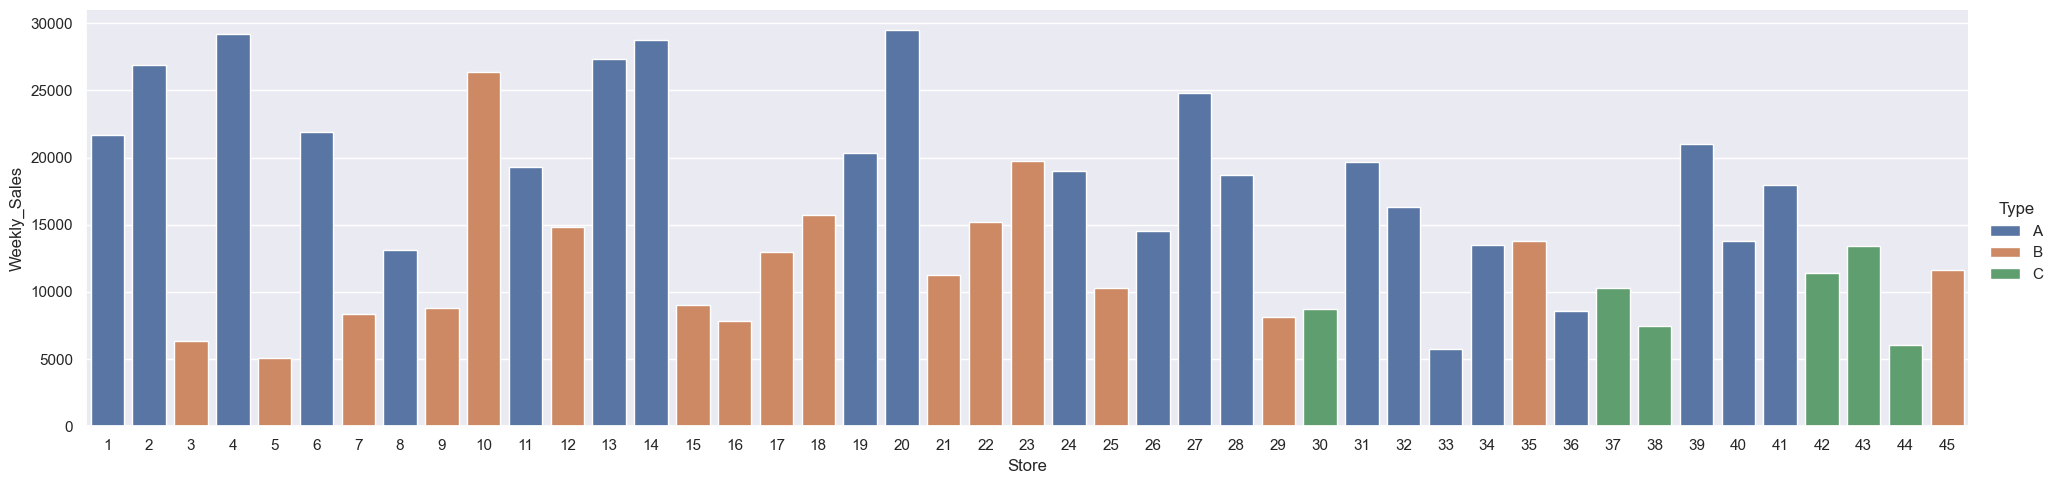

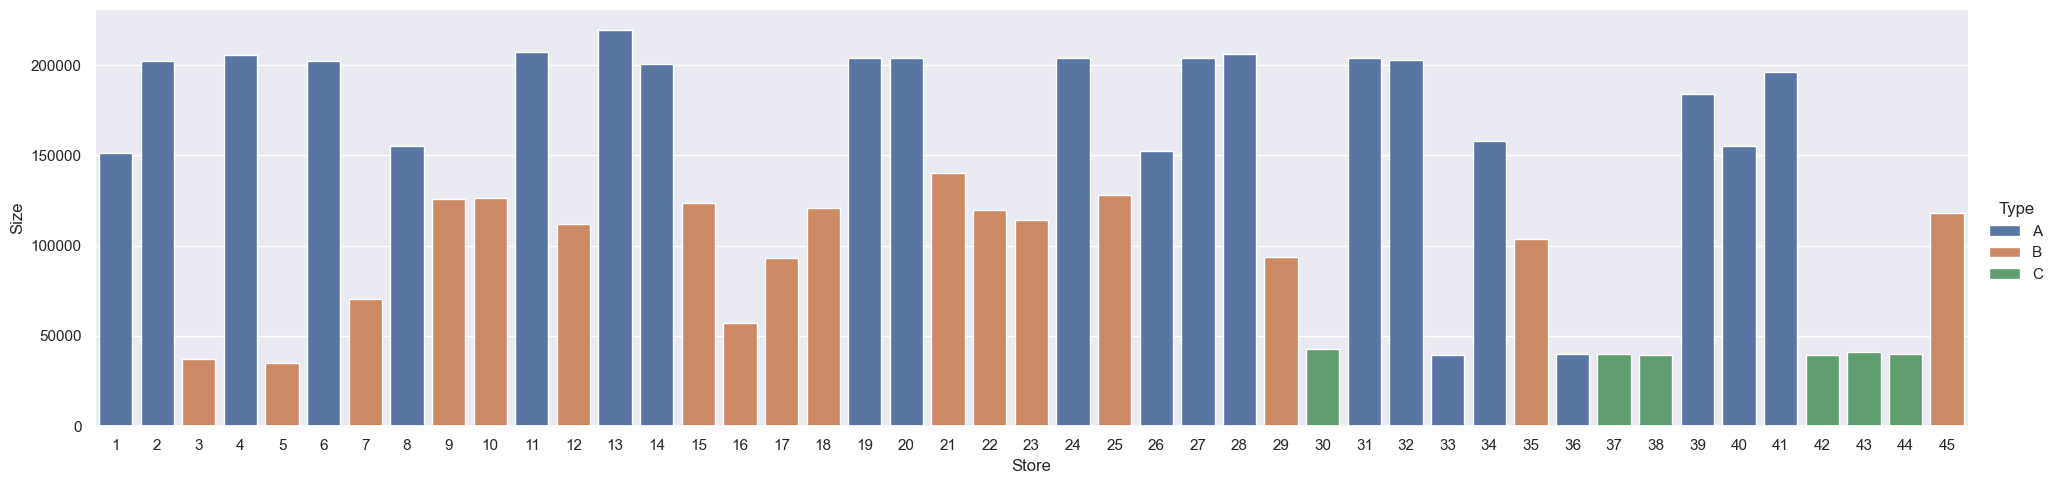

In [8]:
sns.catplot(avg_weekly_sales_by_store, x="Store", y="Weekly_Sales",hue="Type", kind='bar', aspect=4)
sns.catplot(avg_weekly_sales_by_store, x="Store", y="Size",hue="Type", kind='bar', aspect=4)

### What can we learn from this?

If we take a look at the two bar charts we can see some clear relationships. The first thing that stands out to me in a very obvious was is the relationship between the store sizes and the store types. We can see very clearly, for example, that all stores labeled type 'C' seem to be the smallest in size. The stores with type 'B' are generally a little bigger than type 'C' stores. Finally, the biggest group of stores seems to be the type 'A' stores.

The data isn't specific about what the 'Size' variable is referring to specifically. Because of this, I think it's ok to assume that the store simply has more employees, more customers, and more space in general.

Using this information we can guess that there might be something about the store types that make as store more likely to be larger or smaller. For example, the stores that are type 'C' might all be located in very crowded inner-city areas.

### Sales and store type

We can also see that there seems to be a relationship between store type and the store's average weekly sales. What we might infer if we had only looked at one chart, is that the store type and store sales have a strong relationship. However, by bring the two charts up together and comparing them side-by-side, we can see that the sales seem to be higher for stores of a larger size as well.

This means we have to question what is really driving the sales of these stores. Is it the store type that is the most meaningful variable in understanding the average weekly sales of a store or is it simply a matter of store size. 

### What we can't learn from this.

We cannot assume that the company is categorizing the stores 'Type' according to size. We can see that there are some type 'A' and type 'B' stores that are just as small in 'Size' as the type 'C' stores. So, we can see a clear relationship but we cannot say, for example, that all stores type 'C' are the smallest stores in size.

We might find that with more exploration we can figure out exactly what it is that coorelates the strongest to each stores sales. We might also get a better clue at what the store types are referring too. Maybe we find more evidence, for example, that supports our theory that stores type 'C' are located in cities.

In [9]:
grouped_by_date = all_tables_merged_df.groupby('Date').agg({
    "Weekly_Sales": 'mean',
    "Temperature": 'mean',
    "Fuel_Price": 'mean',
    "CPI": 'mean',
    "Unemployment": 'mean'}).reset_index()

grouped_by_date['Weekly_Sales'] = round(grouped_by_date['Weekly_Sales'], 2)
grouped_by_date['Temperature'] = round(grouped_by_date['Temperature'], 2)
grouped_by_date['Fuel_Price'] = round(grouped_by_date['Fuel_Price'], 2)
grouped_by_date['CPI'] = round(grouped_by_date['CPI'], 2)
grouped_by_date['Unemployment'] = round(grouped_by_date['Unemployment'], 2)

grouped_by_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          143 non-null    datetime64[ns]
 1   Weekly_Sales  143 non-null    float64       
 2   Temperature   143 non-null    float64       
 3   Fuel_Price    143 non-null    float64       
 4   CPI           143 non-null    float64       
 5   Unemployment  143 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 6.8 KB


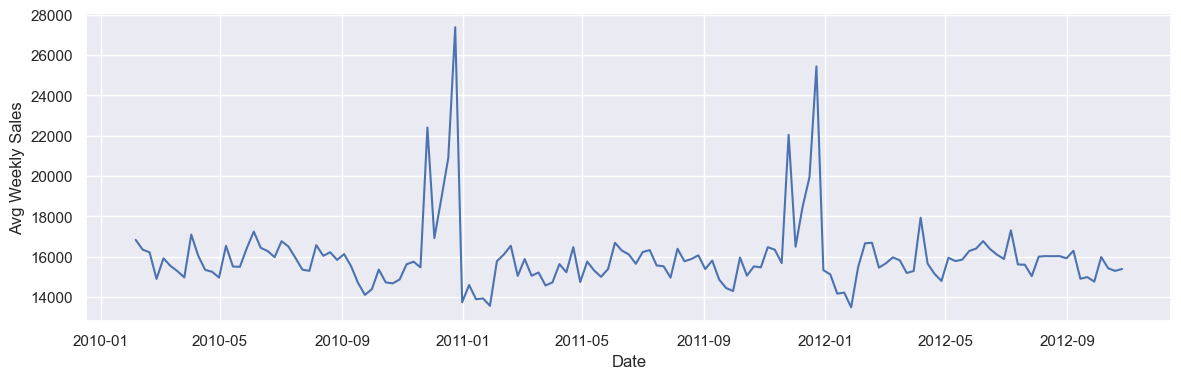

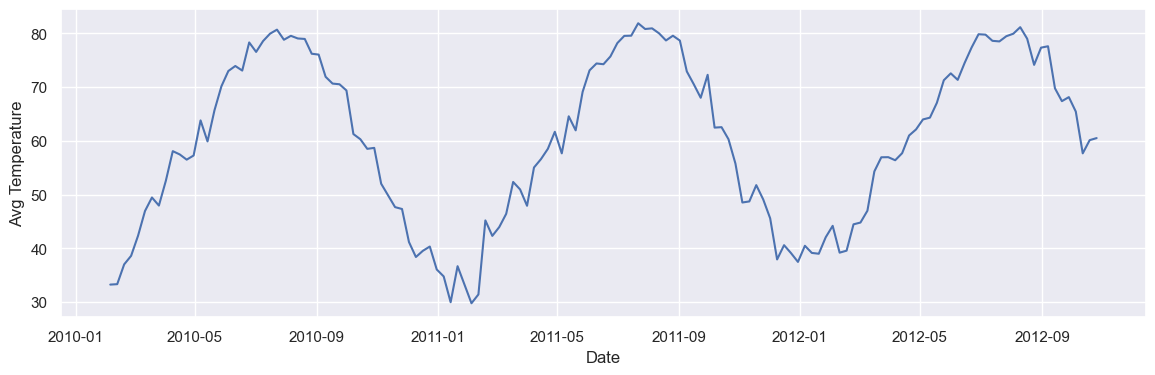

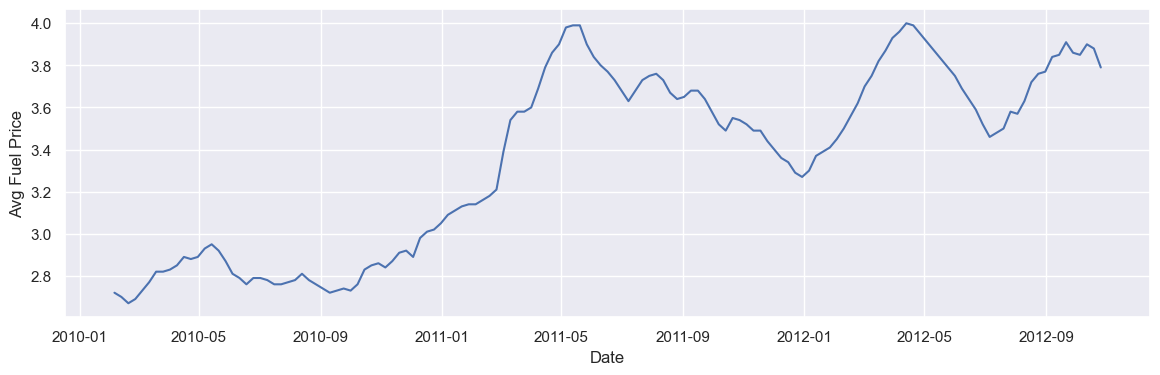

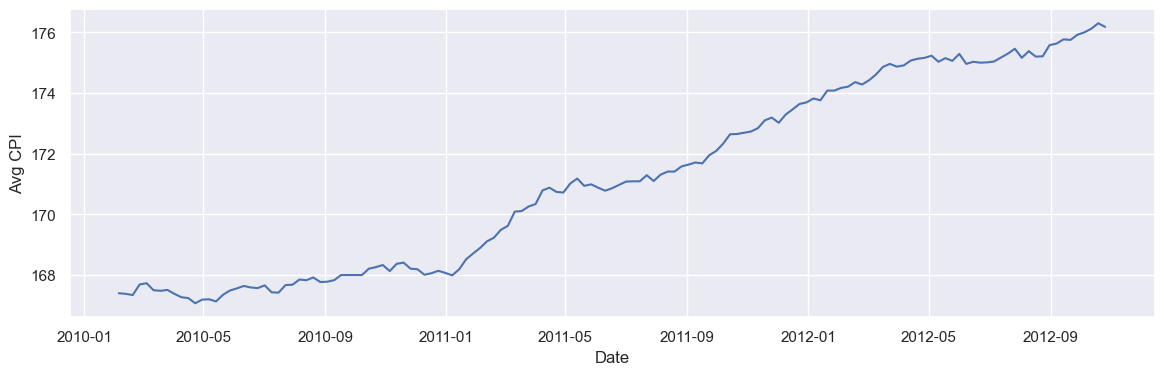

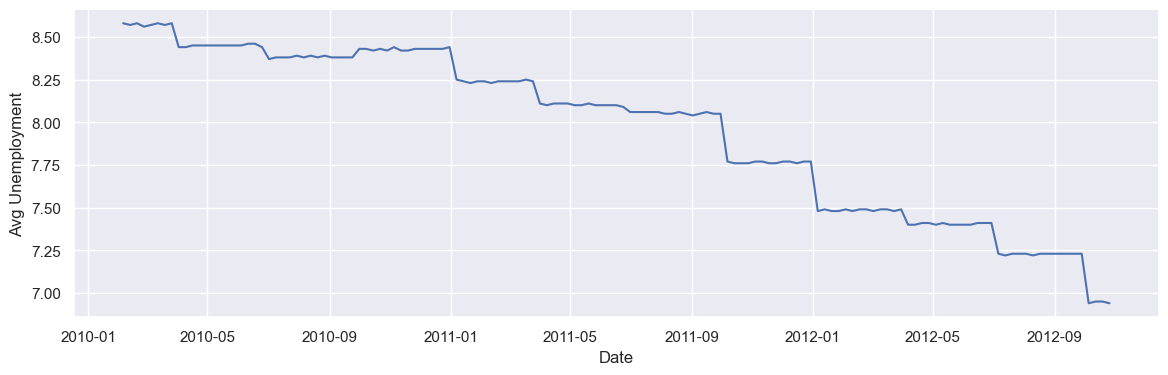

In [16]:
plt.figure(figsize=(14, 4))
plt.plot(grouped_by_date["Date"], grouped_by_date["Weekly_Sales"])
plt.xlabel("Date")
plt.ylabel("Avg Weekly Sales")
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(grouped_by_date["Date"], grouped_by_date["Temperature"])
plt.xlabel("Date")
plt.ylabel("Avg Temperature")
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(grouped_by_date["Date"], grouped_by_date["Fuel_Price"])
plt.xlabel("Date")
plt.ylabel("Avg Fuel Price")
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(grouped_by_date["Date"], grouped_by_date["CPI"])
plt.xlabel("Date")
plt.ylabel("Avg CPI")
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(grouped_by_date["Date"], grouped_by_date["Unemployment"])
plt.xlabel("Date")
plt.ylabel("Avg Unemployment")
plt.show()

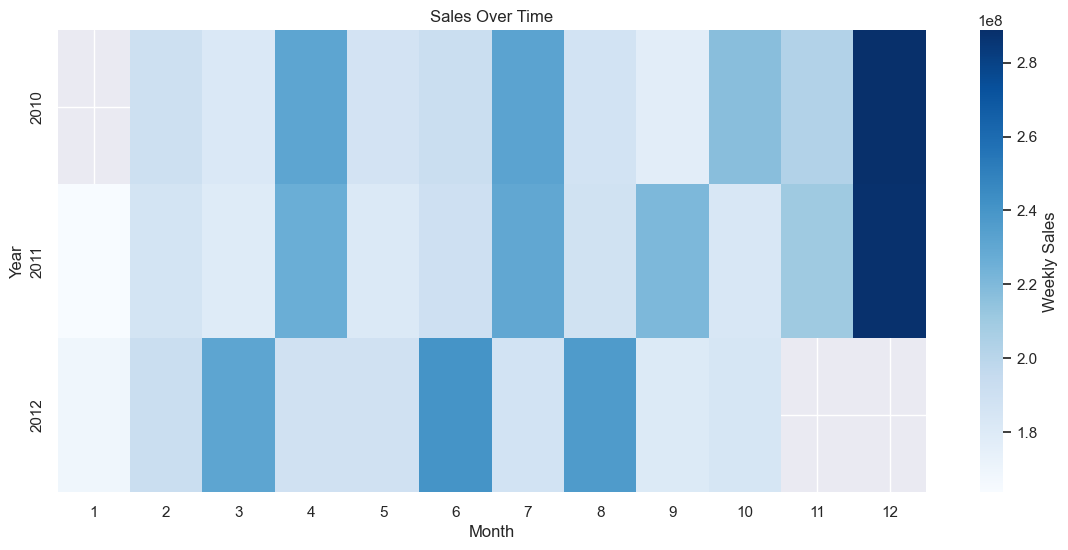

In [30]:
temp_sales_table = all_tables_merged_df[['Date', 'Weekly_Sales']].reset_index()

temp_sales_table["Year"] = temp_sales_table["Date"].dt.year
temp_sales_table["Month"] = temp_sales_table["Date"].dt.month
temp_sales_table.drop(columns=['Date'], inplace=True)


sales = temp_sales_table.groupby(["Year", "Month"]).sum()

sales_month_year = sales.reset_index().pivot(index="Year", columns="Month", values="Weekly_Sales")

plt.figure(figsize=(14,6))
sns.heatmap(sales_month_year, cbar_kws={"label": "Weekly Sales"}, cmap="Blues")
plt.title("Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()